In [1]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler


#1. Program Structure
a. Import Dataset
Load the dataset from a CSV file.
Inspect the initial structure of the data.
b. Data Understanding
Display basic statistics (distribution, missing values, column types).
Perform simple visualizations to understand patterns in the data.
c. Data Preparation
Mapping (Micro Map and Macro Map):

Create Micro Map with only numerical columns.
Create Macro Map including numerical and binary (0/1) columns.
Convert True/False to 0/1:

Identify boolean columns and convert them.
Normalization:

Apply StandardScaler to normalize numerical features, if needed.
Handle Missing Values:

Impute or drop rows/columns based on missing data thresholds.
Train-Test Split:

Split the dataset into 80% train and 20% test.
d. Classification
Implement classifiers like:
Decision Tree
Random Forest
Logistic Regression
Evaluate performance using metrics like:
Accuracy
Precision, Recall, F1-Score


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml.classification import RandomForestClassifier, DecisionTreeClassifier, LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.types import DoubleType


### Step 1: Verify the Combined Data
Before proceeding, let's inspect the combined dataset for structure and completeness:

In [3]:
from pyspark.sql import SparkSession

# Krijo një sesion Spark
spark = SparkSession.builder \
    .appName("Combine CSV Files") \
    .getOrCreate()

# Lista e skedarëve të ngarkuar
file_paths = [
    "/Users/elvislleshi/Desktop/DDAM/cleaned_data.csv/part-00000-b3c0df62-e5fd-4925-9d9b-39983222698e-c000.csv",
    "/Users/elvislleshi/Desktop/DDAM/cleaned_data.csv/part-00001-b3c0df62-e5fd-4925-9d9b-39983222698e-c000.csv",
    "/Users/elvislleshi/Desktop/DDAM/cleaned_data.csv/part-00002-b3c0df62-e5fd-4925-9d9b-39983222698e-c000.csv",
    "/Users/elvislleshi/Desktop/DDAM/cleaned_data.csv/part-00003-b3c0df62-e5fd-4925-9d9b-39983222698e-c000.csv",
    "/Users/elvislleshi/Desktop/DDAM/cleaned_data.csv/part-00004-b3c0df62-e5fd-4925-9d9b-39983222698e-c000.csv",
    "/Users/elvislleshi/Desktop/DDAM/cleaned_data.csv/part-00005-b3c0df62-e5fd-4925-9d9b-39983222698e-c000.csv",
    "/Users/elvislleshi/Desktop/DDAM/cleaned_data.csv/part-00006-b3c0df62-e5fd-4925-9d9b-39983222698e-c000.csv",
    "/Users/elvislleshi/Desktop/DDAM/cleaned_data.csv/part-00007-b3c0df62-e5fd-4925-9d9b-39983222698e-c000.csv",
    "/Users/elvislleshi/Desktop/DDAM/cleaned_data.csv/part-00008-b3c0df62-e5fd-4925-9d9b-39983222698e-c000.csv"
]

# Lexo dhe bashko të gjitha datasetet
dataframes = [spark.read.csv(file, header=True, inferSchema=True) for file in file_paths]

# Bashko datasetet
df = dataframes[0]
for df in dataframes[1:]:
    df = df.union(df)

# Shfaq rreshtat e para për verifikim
df.show()


24/12/03 03:02:48 WARN Utils: Your hostname, Elviss-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.57 instead (on interface en0)
24/12/03 03:02:48 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/03 03:02:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/12/03 03:02:50 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/12/03 03:03:20 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-----+-----+-----------------+----------+--------+-------------------+-------------------+---------+------------------+------------------+--------------------+--------------+-----------+------------+--------------+--------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+-----------+-----------+----+----+------------------+
|State|Month|Weather_Condition|    County|Severity|         Start_Time|           End_Time|Start_Lat|         Start_Lng|      Distance(mi)|                City|Temperature(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|  Wind_Speed(mph)|Precipitation(in)|Amenity| Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station| Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Civil_Twilight|Day_of_Week|Day_of_Year|Year|Hour|  Traffic_Duration|
+-----+-----+-----------------+----------+--------+-------------------+-------

In [4]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Macro Map Classification").getOrCreate()

# Load Macro Map dataset (assuming it's derived from your existing dataset)
macro_map = df.select(
    'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 
    'Traffic_Duration', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Civil_Twilight', 'Severity'
)

# Check the data
macro_map.show(5)


24/12/03 03:03:21 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+---------+------------------+------------+--------------+-----------+------------+--------------+-----------------+-----------------+----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+--------------+--------+
|Start_Lat|         Start_Lng|Distance(mi)|Temperature(F)|Humidity(%)|Pressure(in)|Visibility(mi)|  Wind_Speed(mph)|Precipitation(in)|Traffic_Duration|Amenity| Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station| Stop|Traffic_Calming|Traffic_Signal|Civil_Twilight|Severity|
+---------+------------------+------------+--------------+-----------+------------+--------------+-----------------+-----------------+----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+--------------+--------+
| 40.06695|-75.66226999999998|       0.253|          32.0|       55.0|        29.4|          10.0|              7.0|              0.0

### Convert each binary column to 0 and 1

In [5]:
from pyspark.sql.functions import when

# List of binary columns to convert
binary_columns = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Civil_Twilight'
]

# Convert each binary column to 0 and 1
for col in binary_columns:
    macro_map = macro_map.withColumn(col, when(macro_map[col] == True, 1).otherwise(0))

# Verify the changes
macro_map.select(binary_columns).show(5)


+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+--------------+
|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|Civil_Twilight|
+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+--------------+
|      0|   0|       0|       0|       0|      0|      0|         0|      0|   0|              0|             0|             0|
|      0|   0|       0|       0|       0|      0|      0|         0|      0|   0|              0|             1|             0|
|      0|   0|       0|       0|       0|      0|      0|         0|      0|   0|              0|             1|             0|
|      0|   0|       0|       0|       0|      0|      0|         0|      0|   0|              0|             0|             0|
|      0|   0|       0|       0|       0|      0|      0|         0|      0|   0|              0|       

In [6]:
# Check the schema to ensure all binary columns are now integer
macro_map.printSchema()


root
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Precipitation(in): double (nullable = true)
 |-- Traffic_Duration: double (nullable = true)
 |-- Amenity: integer (nullable = false)
 |-- Bump: integer (nullable = false)
 |-- Crossing: integer (nullable = false)
 |-- Give_Way: integer (nullable = false)
 |-- Junction: integer (nullable = false)
 |-- No_Exit: integer (nullable = false)
 |-- Railway: integer (nullable = false)
 |-- Roundabout: integer (nullable = false)
 |-- Station: integer (nullable = false)
 |-- Stop: integer (nullable = false)
 |-- Traffic_Calming: integer (nullable = false)
 |-- Traffic_Signal: integer (nullable = false)
 |-- Civil_Twilight: integer (nullable 

In [7]:
macro_map.show(5) 

+---------+------------------+------------+--------------+-----------+------------+--------------+-----------------+-----------------+----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+--------------+--------+
|Start_Lat|         Start_Lng|Distance(mi)|Temperature(F)|Humidity(%)|Pressure(in)|Visibility(mi)|  Wind_Speed(mph)|Precipitation(in)|Traffic_Duration|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|Civil_Twilight|Severity|
+---------+------------------+------------+--------------+-----------+------------+--------------+-----------------+-----------------+----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+--------------+--------+
| 40.06695|-75.66226999999998|       0.253|          32.0|       55.0|        29.4|          10.0|              7.0|              0.0|     

In [8]:
# Add Severity to Macro Map
macro_map = df.select(
    'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 
    'Traffic_Duration', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Civil_Twilight', 'Severity'  # Include Severity
)

# Check the new dataset
macro_map.show(5)


+---------+------------------+------------+--------------+-----------+------------+--------------+-----------------+-----------------+----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+--------------+--------+
|Start_Lat|         Start_Lng|Distance(mi)|Temperature(F)|Humidity(%)|Pressure(in)|Visibility(mi)|  Wind_Speed(mph)|Precipitation(in)|Traffic_Duration|Amenity| Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station| Stop|Traffic_Calming|Traffic_Signal|Civil_Twilight|Severity|
+---------+------------------+------------+--------------+-----------+------------+--------------+-----------------+-----------------+----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+--------------+--------+
| 40.06695|-75.66226999999998|       0.253|          32.0|       55.0|        29.4|          10.0|              7.0|              0.0

In [9]:
from pyspark.sql.types import DoubleType

# Find columns of type DoubleType
double_columns = [col for col in macro_map.columns if isinstance(macro_map.schema[col].dataType, DoubleType)]

# Display distinct values for each double column to confirm if they are binary
for col in double_columns:
    print(f"Distinct values in column '{col}':")
    macro_map.select(col).distinct().show()


Distinct values in column 'Start_Lat':


+---------+
|Start_Lat|
+---------+
| 40.04925|
| 38.63069|
| 32.67597|
| 39.77969|
|34.910236|
| 38.80473|
| 40.76056|
|40.741274|
|40.772676|
| 40.85911|
| 40.72626|
| 40.02576|
|37.491449|
| 42.00798|
| 43.46022|
|43.598328|
| 35.71758|
| 39.80506|
| 35.10773|
| 33.63232|
+---------+
only showing top 20 rows

Distinct values in column 'Start_Lng':


+------------------+
|         Start_Lng|
+------------------+
|        -80.274263|
|        -104.98031|
|       -104.888992|
|        -105.01481|
|-76.28762900000002|
|        -80.001365|
|-81.84206999999998|
|-81.75846999999997|
|         -76.35298|
|        -76.426086|
|        -77.548855|
|        -111.97119|
|-82.36926700000002|
|-85.72858000000002|
|         -93.36127|
|        -81.030948|
|        -78.859161|
|          -80.8373|
|         -84.32383|
|-83.76590999999998|
+------------------+
only showing top 20 rows

Distinct values in column 'Distance(mi)':


+------------------+
|      Distance(mi)|
+------------------+
|             0.204|
|             0.194|
|0.5920000000000001|
|0.4370000000000001|
|             2.107|
|            29.153|
|             0.526|
|             0.134|
|              0.66|
|             1.921|
|             3.179|
|             5.879|
|0.6890000000000001|
|             1.097|
|             1.153|
|1.5519999999999998|
|             2.057|
|             1.757|
|             4.132|
|            28.647|
+------------------+
only showing top 20 rows

Distinct values in column 'Temperature(F)':


+--------------+
|Temperature(F)|
+--------------+
|          69.8|
|          49.8|
|          56.8|
|          74.5|
|          64.2|
|          47.5|
|          72.3|
|          18.3|
|          86.9|
|          78.4|
|          67.0|
|          70.0|
|          45.3|
|          96.8|
|          55.8|
|          10.2|
|          44.8|
|          56.5|
|          50.9|
|          69.0|
+--------------+
only showing top 20 rows

Distinct values in column 'Humidity(%)':
+------------------+
|       Humidity(%)|
+------------------+
|              67.0|
|              70.0|
| 89.51042611060744|
| 61.05476759914528|
| 92.10588713713713|
| 65.39026431132953|
| 78.80286712974981|
| 56.89089737157164|
| 87.70969240856353|
| 91.51968456753875|
|55.881438062632526|
| 58.93028641037501|
| 64.60416730416345|
|  94.9895165987187|
| 45.37201013781087|
| 69.69947326233826|
| 85.48028985507247|
|  76.8544621265981|
| 85.47937022856118|
|  83.6931197401447|
+------------------+
only showing top 20 r

+------------+
|Pressure(in)|
+------------+
|       23.04|
|       30.49|
|        26.7|
|       24.19|
|       24.42|
|       24.96|
|       24.03|
|       30.81|
|       28.23|
|       29.47|
|       30.79|
|        25.1|
|       29.74|
|       22.83|
|       29.15|
|       27.53|
|        24.7|
|       25.77|
|       29.42|
|       26.08|
+------------+
only showing top 20 rows

Distinct values in column 'Visibility(mi)':
+------------------+
|    Visibility(mi)|
+------------------+
|               8.0|
|              70.0|
| 9.958852556600057|
|               0.2|
| 9.847060342450694|
| 9.856426891695829|
|               0.1|
|              0.12|
|              0.63|
|               2.8|
|4.0559934974121115|
|10.043811691752193|
|  8.67136387544712|
| 9.856079247556504|
| 9.183539076196027|
|               1.2|
|               0.9|
|               1.8|
| 6.838560880884299|
| 9.785105407882675|
+------------------+
only showing top 20 rows

Distinct values in column 'Wind_Speed(mp

+-----------------+
|Precipitation(in)|
+-----------------+
|             0.66|
|             0.07|
|              0.0|
|             0.16|
|             0.18|
|              0.2|
|             1.52|
|             0.05|
|             9.99|
|             0.39|
|             0.79|
|             2.27|
|             0.72|
|             0.24|
|             0.54|
|             0.21|
|             0.61|
|             0.12|
|             2.04|
|             0.42|
+-----------------+
only showing top 20 rows

Distinct values in column 'Traffic_Duration':
+------------------+
|  Traffic_Duration|
+------------------+
|29.316666666666666|
|             305.0|
|26.733333333333334|
|360.03333333333336|
|299.28333333333336|
|             299.0|
|              26.7|
| 598.8666666666667|
|58.083333333333336|
| 363.3666666666667|
|27.933333333333334|
| 299.6166666666667|
|              15.4|
|14.333333333333334|
|           5334.35|
|            249.35|
| 363.3833333333333|
|             29.15|
| 364.1

In [10]:
from pyspark.sql.types import DoubleType

# Find columns of type DoubleType
double_columns = [col for col in macro_map.columns if isinstance(macro_map.schema[col].dataType, DoubleType)]

# Display distinct values for each double column to confirm if they are binary
for col in double_columns:
    print(f"Distinct values in column '{col}':")
    macro_map.select(col).distinct().show()


Distinct values in column 'Start_Lat':


+---------+
|Start_Lat|
+---------+
| 40.04925|
| 38.63069|
| 32.67597|
| 39.77969|
|34.910236|
| 38.80473|
| 40.76056|
|40.741274|
|40.772676|
| 40.85911|
| 40.72626|
| 40.02576|
|37.491449|
| 42.00798|
| 43.46022|
|43.598328|
| 35.71758|
| 39.80506|
| 35.10773|
| 33.63232|
+---------+
only showing top 20 rows

Distinct values in column 'Start_Lng':


+------------------+
|         Start_Lng|
+------------------+
|        -80.274263|
|        -104.98031|
|       -104.888992|
|        -105.01481|
|-76.28762900000002|
|        -80.001365|
|-81.84206999999998|
|-81.75846999999997|
|         -76.35298|
|        -76.426086|
|        -77.548855|
|        -111.97119|
|-82.36926700000002|
|-85.72858000000002|
|         -93.36127|
|        -81.030948|
|        -78.859161|
|          -80.8373|
|         -84.32383|
|-83.76590999999998|
+------------------+
only showing top 20 rows

Distinct values in column 'Distance(mi)':
+------------------+
|      Distance(mi)|
+------------------+
|             0.204|
|             0.194|
|0.5920000000000001|
|0.4370000000000001|
|             2.107|
|            29.153|
|             0.526|
|             0.134|
|              0.66|
|             1.921|
|             3.179|
|             5.879|
|0.6890000000000001|
|             1.097|
|             1.153|
|1.5519999999999998|
|             2.057|
|       

+--------------+
|Temperature(F)|
+--------------+
|          69.8|
|          49.8|
|          56.8|
|          74.5|
|          64.2|
|          47.5|
|          72.3|
|          18.3|
|          86.9|
|          78.4|
|          67.0|
|          70.0|
|          45.3|
|          96.8|
|          55.8|
|          10.2|
|          44.8|
|          56.5|
|          50.9|
|          69.0|
+--------------+
only showing top 20 rows

Distinct values in column 'Humidity(%)':
+------------------+
|       Humidity(%)|
+------------------+
|              67.0|
|              70.0|
| 89.51042611060744|
| 61.05476759914528|
| 92.10588713713713|
| 65.39026431132953|
| 78.80286712974981|
| 56.89089737157164|
| 87.70969240856353|
| 91.51968456753875|
|55.881438062632526|
| 58.93028641037501|
| 64.60416730416345|
|  94.9895165987187|
| 45.37201013781087|
| 69.69947326233826|
| 85.48028985507247|
|  76.8544621265981|
| 85.47937022856118|
|  83.6931197401447|
+------------------+
only showing top 20 r

+------------+
|Pressure(in)|
+------------+
|       23.04|
|       30.49|
|        26.7|
|       24.19|
|       24.42|
|       24.96|
|       24.03|
|       30.81|
|       28.23|
|       29.47|
|       30.79|
|        25.1|
|       29.74|
|       22.83|
|       29.15|
|       27.53|
|        24.7|
|       25.77|
|       29.42|
|       26.08|
+------------+
only showing top 20 rows

Distinct values in column 'Visibility(mi)':
+------------------+
|    Visibility(mi)|
+------------------+
|               8.0|
|              70.0|
| 9.958852556600057|
|               0.2|
| 9.847060342450694|
| 9.856426891695829|
|               0.1|
|              0.12|
|              0.63|
|               2.8|
|4.0559934974121115|
|10.043811691752193|
|  8.67136387544712|
| 9.856079247556504|
| 9.183539076196027|
|               1.2|
|               0.9|
|               1.8|
| 6.838560880884299|
| 9.785105407882675|
+------------------+
only showing top 20 rows

Distinct values in column 'Wind_Speed(mp

+------------------+
|  Traffic_Duration|
+------------------+
|29.316666666666666|
|             305.0|
|26.733333333333334|
|360.03333333333336|
|299.28333333333336|
|             299.0|
|              26.7|
| 598.8666666666667|
|58.083333333333336|
| 363.3666666666667|
|27.933333333333334|
| 299.6166666666667|
|              15.4|
|14.333333333333334|
|           5334.35|
|            249.35|
| 363.3833333333333|
|             29.15|
| 364.1333333333333|
|360.01666666666665|
+------------------+
only showing top 20 rows



In [11]:
macro_map.printSchema()

root
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Precipitation(in): double (nullable = true)
 |-- Traffic_Duration: double (nullable = true)
 |-- Amenity: boolean (nullable = true)
 |-- Bump: boolean (nullable = true)
 |-- Crossing: boolean (nullable = true)
 |-- Give_Way: boolean (nullable = true)
 |-- Junction: boolean (nullable = true)
 |-- No_Exit: boolean (nullable = true)
 |-- Railway: boolean (nullable = true)
 |-- Roundabout: boolean (nullable = true)
 |-- Station: boolean (nullable = true)
 |-- Stop: boolean (nullable = true)
 |-- Traffic_Calming: boolean (nullable = true)
 |-- Traffic_Signal: boolean (nullable = true)
 |-- Civil_Twilight: string (nullable = true)
 |-- 

In [12]:
macro_map.show(5)

+---------+------------------+------------+--------------+-----------+------------+--------------+-----------------+-----------------+----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+--------------+--------+
|Start_Lat|         Start_Lng|Distance(mi)|Temperature(F)|Humidity(%)|Pressure(in)|Visibility(mi)|  Wind_Speed(mph)|Precipitation(in)|Traffic_Duration|Amenity| Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station| Stop|Traffic_Calming|Traffic_Signal|Civil_Twilight|Severity|
+---------+------------------+------------+--------------+-----------+------------+--------------+-----------------+-----------------+----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+--------------+--------+
| 40.06695|-75.66226999999998|       0.253|          32.0|       55.0|        29.4|          10.0|              7.0|              0.0

In [13]:
from pyspark.sql.types import BooleanType

# Find all columns of type BooleanType
boolean_columns = [col for col in macro_map.columns if isinstance(macro_map.schema[col].dataType, BooleanType)]

# Print identified Boolean columns
print(f"Boolean columns: {boolean_columns}")


Boolean columns: ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']


In [14]:
from pyspark.sql.functions import when

# Convert all Boolean columns to 0 and 1
for col in boolean_columns:
    macro_map = macro_map.withColumn(col, when(macro_map[col] == True, 1).otherwise(0))

# Verify the transformation
macro_map.select(boolean_columns).show(5)


+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+
|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|
+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+
|      0|   0|       0|       0|       0|      0|      0|         0|      0|   0|              0|             0|
|      0|   0|       0|       0|       0|      0|      0|         0|      0|   0|              0|             1|
|      0|   0|       0|       0|       0|      0|      0|         0|      0|   0|              0|             1|
|      0|   0|       0|       0|       0|      0|      0|         0|      0|   0|              0|             0|
|      0|   0|       0|       0|       0|      0|      0|         0|      0|   0|              0|             0|
+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------

In [15]:
# Check the schema to ensure all boolean columns are converted
macro_map.printSchema()

# Verify distinct values in transformed columns
for col in boolean_columns:
    macro_map.select(col).distinct().show()


root
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Precipitation(in): double (nullable = true)
 |-- Traffic_Duration: double (nullable = true)
 |-- Amenity: integer (nullable = false)
 |-- Bump: integer (nullable = false)
 |-- Crossing: integer (nullable = false)
 |-- Give_Way: integer (nullable = false)
 |-- Junction: integer (nullable = false)
 |-- No_Exit: integer (nullable = false)
 |-- Railway: integer (nullable = false)
 |-- Roundabout: integer (nullable = false)
 |-- Station: integer (nullable = false)
 |-- Stop: integer (nullable = false)
 |-- Traffic_Calming: integer (nullable = false)
 |-- Traffic_Signal: integer (nullable = false)
 |-- Civil_Twilight: string (nullable =

+-------+
|Amenity|
+-------+
|      1|
|      0|
+-------+

+----+
|Bump|
+----+
|   1|
|   0|
+----+

+--------+
|Crossing|
+--------+
|       1|
|       0|
+--------+

+--------+
|Give_Way|
+--------+
|       1|
|       0|
+--------+

+--------+
|Junction|
+--------+
|       1|
|       0|
+--------+

+-------+
|No_Exit|
+-------+
|      1|
|      0|
+-------+



+-------+
|Railway|
+-------+
|      1|
|      0|
+-------+

+----------+
|Roundabout|
+----------+
|         0|
|         1|
+----------+

+-------+
|Station|
+-------+
|      1|
|      0|
+-------+

+----+
|Stop|
+----+
|   1|
|   0|
+----+



+---------------+
|Traffic_Calming|
+---------------+
|              1|
|              0|
+---------------+

+--------------+
|Traffic_Signal|
+--------------+
|             1|
|             0|
+--------------+



In [16]:
macro_map.show(5)

+---------+------------------+------------+--------------+-----------+------------+--------------+-----------------+-----------------+----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+--------------+--------+
|Start_Lat|         Start_Lng|Distance(mi)|Temperature(F)|Humidity(%)|Pressure(in)|Visibility(mi)|  Wind_Speed(mph)|Precipitation(in)|Traffic_Duration|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|Civil_Twilight|Severity|
+---------+------------------+------------+--------------+-----------+------------+--------------+-----------------+-----------------+----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+--------------+--------+
| 40.06695|-75.66226999999998|       0.253|          32.0|       55.0|        29.4|          10.0|              7.0|              0.0|     

In [17]:
macro_map.select("Civil_Twilight").distinct().show()


+--------------+
|Civil_Twilight|
+--------------+
|         Night|
|           Day|
+--------------+



In [18]:
from pyspark.sql.functions import when

# Convert Civil_Twilight to binary (0 and 1)
macro_map = macro_map.withColumn("Civil_Twilight", when(macro_map["Civil_Twilight"] == "Night", 1).otherwise(0))

# Verify the transformation
macro_map.select("Civil_Twilight").distinct().show()


+--------------+
|Civil_Twilight|
+--------------+
|             1|
|             0|
+--------------+



In [19]:
from pyspark.ml.feature import StandardScaler, VectorAssembler

# Assemble features into a single vector
feature_columns = [
    'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 
    'Traffic_Duration', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Civil_Twilight'
]

# Combine all feature columns into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
macro_map_assembled = assembler.transform(macro_map)

# Apply Standard Scaler
scaler = StandardScaler(inputCol="features", outputCol="features_standard_scaled", withMean=True, withStd=True)
scaler_model = scaler.fit(macro_map_assembled)
macro_map_standard_scaled = scaler_model.transform(macro_map_assembled)

# Show scaled features
macro_map_standard_scaled.select("features_standard_scaled").show(5, truncate=False)


+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_standard_scaled                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
+---------------------------------

In [20]:
# Split the Macro Map dataset into train (80%) and test (20%) datasets
train_macro, test_macro = macro_map_assembled.randomSplit([0.8, 0.2], seed=42)

# Print counts to verify the split
print(f"Training Data Count: {train_macro.count()}")
print(f"Test Data Count: {test_macro.count()}")


Training Data Count: 435404


Test Data Count: 108378


In [21]:
# Distribution of Severity in training data
train_macro.groupBy("Severity").count().orderBy("Severity").show()

# Distribution of Severity in test data
test_macro.groupBy("Severity").count().orderBy("Severity").show()


+--------+------+
|Severity| count|
+--------+------+
|       2|289223|
|       3| 81066|
|       4| 65115|
+--------+------+



+--------+-----+
|Severity|count|
+--------+-----+
|       2|71881|
|       3|20230|
|       4|16267|
+--------+-----+



In [22]:
# Kontrollo strukturën e dataset-it
train_macro.printSchema()
test_macro.printSchema()

# Sigurohu që 'features' dhe 'Severity' janë të pranishme
train_macro.select("features", "Severity").show(5)


root
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Precipitation(in): double (nullable = true)
 |-- Traffic_Duration: double (nullable = true)
 |-- Amenity: integer (nullable = false)
 |-- Bump: integer (nullable = false)
 |-- Crossing: integer (nullable = false)
 |-- Give_Way: integer (nullable = false)
 |-- Junction: integer (nullable = false)
 |-- No_Exit: integer (nullable = false)
 |-- Railway: integer (nullable = false)
 |-- Roundabout: integer (nullable = false)
 |-- Station: integer (nullable = false)
 |-- Stop: integer (nullable = false)
 |-- Traffic_Calming: integer (nullable = false)
 |-- Traffic_Signal: integer (nullable = false)
 |-- Civil_Twilight: integer (nullable 

### Random Forest për Macro Map 

In [23]:
from pyspark.ml.classification import RandomForestClassifier

# Initialize Random Forest Classifier
rf_macro = RandomForestClassifier(
    featuresCol="features", 
    labelCol="Severity", 
    numTrees=50,        # Number of trees
    maxDepth=10,        # Maximum depth of each tree
    maxBins=32,         # Number of bins for splitting features
    impurity="gini"     # Impurity measure
)


In [24]:
# Train the Random Forest model
rf_macro_model = rf_macro.fit(train_macro)


24/12/03 03:04:40 WARN DAGScheduler: Broadcasting large task binary with size 1251.8 KiB
24/12/03 03:04:42 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
24/12/03 03:04:45 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
24/12/03 03:04:50 WARN DAGScheduler: Broadcasting large task binary with size 1069.0 KiB
24/12/03 03:04:51 WARN DAGScheduler: Broadcasting large task binary with size 7.1 MiB
24/12/03 03:05:11 WARN DAGScheduler: Broadcasting large task binary with size 1759.7 KiB


In [25]:
# Make predictions on the test dataset
predictions = rf_macro_model.transform(test_macro)

# Display predictions
predictions.select("prediction", "Severity", "features").show(10, truncate=False)


24/12/03 03:05:14 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB


+----------+--------+----------------------------------------------------------------------------------------------------------------+
|prediction|Severity|features                                                                                                        |
+----------+--------+----------------------------------------------------------------------------------------------------------------+
|2.0       |2       |(23,[0,1,3,4,5,6,7,9],[24.577545,-81.71765699999997,84.9,57.0,30.14,10.0,15.0,360.0])                           |
|2.0       |4       |(23,[0,1,3,4,5,6,7,9],[24.64553,-81.56617,79.0,66.0,30.13,10.0,5.8,360.0])                                      |
|2.0       |4       |(23,[0,1,3,4,5,6,7,9,22],[24.720088,-81.062508,77.0,69.0,30.04,10.0,9.2,360.0,1.0])                             |
|2.0       |4       |(23,[0,1,2,3,4,5,6,7,9],[24.99824,-80.537663,0.235,79.0,65.0,30.04,10.0,13.0,27.05])                            |
|4.0       |4       |(23,[0,1,2,3,4,5,6,9],[25.341,-80.

In [26]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Severity", predictionCol="prediction", metricName="accuracy")

# Evaluate accuracy
test_accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")


24/12/03 03:05:15 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB


Test Accuracy: 0.6978


In [27]:
# Evaluate F1-Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="Severity", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print(f"Test F1-Score: {f1_score:.4f}")


24/12/03 03:05:21 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB


Test F1-Score: 0.6186


In [28]:
# Extract feature importances
feature_importances = rf_macro_model.featureImportances

# Map feature names to importances
importance_dict = {feature: importance for feature, importance in zip(feature_columns, feature_importances)}

# Sort and display feature importances
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importance:
Start_Lng: 0.3376
Distance(mi): 0.1723
Traffic_Duration: 0.1341
Civil_Twilight: 0.1218
Start_Lat: 0.0985
Pressure(in): 0.0453
Temperature(F): 0.0178
Humidity(%): 0.0168
Wind_Speed(mph): 0.0110
Junction: 0.0104
Traffic_Signal: 0.0093
Visibility(mi): 0.0081
Crossing: 0.0068
Stop: 0.0038
Precipitation(in): 0.0025
Station: 0.0014
Railway: 0.0008
Amenity: 0.0007
Give_Way: 0.0004
No_Exit: 0.0003
Traffic_Calming: 0.0001
Roundabout: 0.0000
Bump: 0.0000


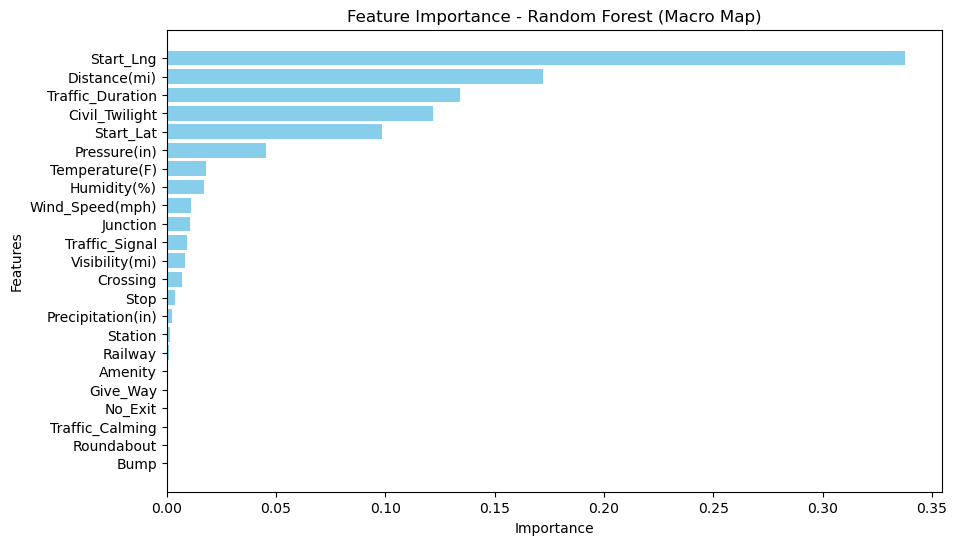

In [29]:
import matplotlib.pyplot as plt

# Assuming feature_importances is extracted from the trained model
# and feature_columns contains the feature names

# Extract and sort feature importance
importance_dict = {feature: importance for feature, importance in zip(feature_columns, rf_macro_model.featureImportances)}
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Prepare data for plotting
features, importances = zip(*sorted_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest (Macro Map)")
plt.gca().invert_yaxis()  #


In [30]:
# Create confusion matrix
confusion_matrix = predictions.groupBy("Severity", "prediction").count()

# Pivot for better visualization
confusion_matrix_pivot = confusion_matrix.groupBy("Severity").pivot("prediction").sum("count").fillna(0)

# Display confusion matrix
confusion_matrix_pivot.show()


24/12/03 03:05:26 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:30 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:30 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:31 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:31 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:36 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB


+--------+-----+----+----+
|Severity|  2.0| 3.0| 4.0|
+--------+-----+----+----+
|       3|17461|2075| 694|
|       4|12859| 387|3021|
|       2|70535| 486| 860|
+--------+-----+----+----+



24/12/03 03:05:37 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB


24/12/03 03:05:39 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:42 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:42 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:43 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:43 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:46 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
24/12/03 03:05:46 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB


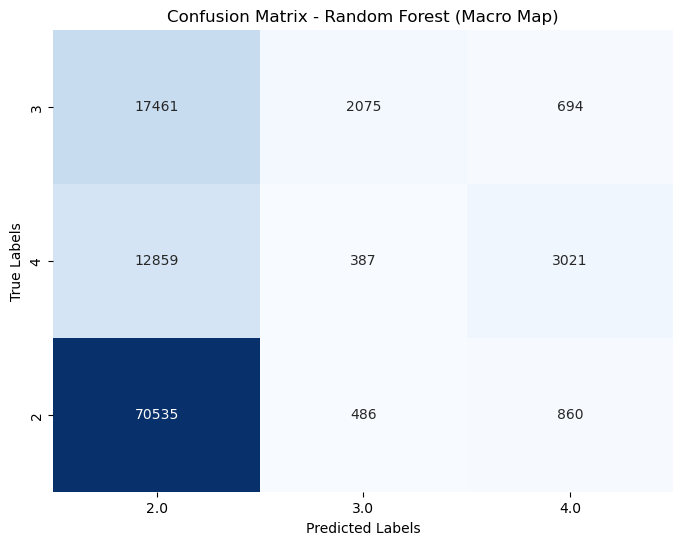

In [31]:
import pandas as pd
import seaborn as sns
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Create confusion matrix from predictions
confusion_matrix = predictions.groupBy("Severity", "prediction").count()

# Pivot the confusion matrix for better visualization
confusion_matrix_pivot = confusion_matrix.groupBy("Severity").pivot("prediction").sum("count").fillna(0)

# Convert to Pandas for heatmap visualization
confusion_matrix_pd = confusion_matrix_pivot.toPandas()

# Set the index to true labels (Severity)
confusion_matrix_pd.set_index("Severity", inplace=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_pd, annot=True, fmt=".0f", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest (Macro Map)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setAppName("RandomForest").set("spark.executor.memory", "4g").set("spark.driver.memory", "8g")
sc = SparkContext(conf=conf)

### Random forest with hyperparameter tuning

In [32]:
import itertools
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define parameter grids
numTrees_grid = [10, 20,30]
maxDepth_grid = [5, 7, 9]
impurity_grid = ["gini", "entropy"]

# Generate all combinations of parameters
param_combinations = list(itertools.product(numTrees_grid, maxDepth_grid, impurity_grid))

# Initialize evaluator for accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="Severity", predictionCol="prediction", metricName="accuracy")

# Store results
results = []

for numTrees, maxDepth, impurity in param_combinations:
    print(f"Training model with numTrees={numTrees}, maxDepth={maxDepth}, impurity={impurity}")
    
    # Initialize Random Forest with the current parameters
    rf = RandomForestClassifier(featuresCol="features", labelCol="Severity", numTrees=numTrees, maxDepth=maxDepth, impurity=impurity)
    
    # Train the model
    rf_model = rf.fit(train_macro)
    
    # Test the model
    predictions = rf_model.transform(test_macro)
    
    # Evaluate the model
    accuracy = evaluator.evaluate(predictions)
    print(f"Validation Accuracy: {accuracy:.4f}")
    
    # Store the result
    results.append({"numTrees": numTrees, "maxDepth": maxDepth, "impurity": impurity, "accuracy": accuracy})

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)

# Sort by accuracy
results_df = results_df.sort_values(by="accuracy", ascending=False)

# Display the best combination
print("\nBest Parameters:")
print(results_df.iloc[0])


Training model with numTrees=10, maxDepth=5, impurity=gini


Validation Accuracy: 0.6642
Training model with numTrees=10, maxDepth=5, impurity=entropy


Validation Accuracy: 0.6639
Training model with numTrees=10, maxDepth=7, impurity=gini


Validation Accuracy: 0.6741
Training model with numTrees=10, maxDepth=7, impurity=entropy


Validation Accuracy: 0.6753
Training model with numTrees=10, maxDepth=9, impurity=gini


Validation Accuracy: 0.6909
Training model with numTrees=10, maxDepth=9, impurity=entropy


Validation Accuracy: 0.6878
Training model with numTrees=20, maxDepth=5, impurity=gini


Validation Accuracy: 0.6675
Training model with numTrees=20, maxDepth=5, impurity=entropy


Validation Accuracy: 0.6672
Training model with numTrees=20, maxDepth=7, impurity=gini


Validation Accuracy: 0.6836
Training model with numTrees=20, maxDepth=7, impurity=entropy


Validation Accuracy: 0.6803
Training model with numTrees=20, maxDepth=9, impurity=gini


24/12/03 03:07:40 WARN DAGScheduler: Broadcasting large task binary with size 1012.3 KiB
24/12/03 03:07:40 WARN DAGScheduler: Broadcasting large task binary with size 1768.3 KiB
24/12/03 03:07:43 WARN DAGScheduler: Broadcasting large task binary with size 1316.3 KiB


Validation Accuracy: 0.6942
Training model with numTrees=20, maxDepth=9, impurity=entropy


24/12/03 03:07:53 WARN DAGScheduler: Broadcasting large task binary with size 1010.6 KiB
24/12/03 03:07:55 WARN DAGScheduler: Broadcasting large task binary with size 1754.5 KiB
24/12/03 03:07:57 WARN DAGScheduler: Broadcasting large task binary with size 1237.4 KiB


Validation Accuracy: 0.6928
Training model with numTrees=30, maxDepth=5, impurity=gini


Validation Accuracy: 0.6671
Training model with numTrees=30, maxDepth=5, impurity=entropy


Validation Accuracy: 0.6662
Training model with numTrees=30, maxDepth=7, impurity=gini


Validation Accuracy: 0.6785
Training model with numTrees=30, maxDepth=7, impurity=entropy


Validation Accuracy: 0.6780
Training model with numTrees=30, maxDepth=9, impurity=gini


24/12/03 03:08:58 WARN DAGScheduler: Broadcasting large task binary with size 1452.3 KiB
24/12/03 03:08:59 WARN DAGScheduler: Broadcasting large task binary with size 2.5 MiB
24/12/03 03:09:03 WARN DAGScheduler: Broadcasting large task binary with size 1886.8 KiB


Validation Accuracy: 0.6929
Training model with numTrees=30, maxDepth=9, impurity=entropy


24/12/03 03:09:16 WARN DAGScheduler: Broadcasting large task binary with size 1467.5 KiB
24/12/03 03:09:18 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
24/12/03 03:09:21 WARN DAGScheduler: Broadcasting large task binary with size 1830.5 KiB


Validation Accuracy: 0.6924

Best Parameters:
numTrees          20
maxDepth           9
impurity        gini
accuracy    0.694218
Name: 10, dtype: object


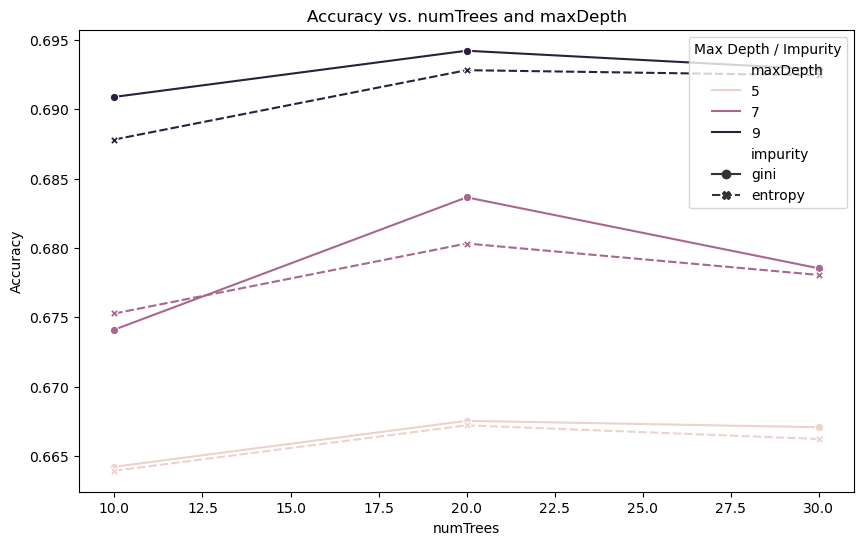

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot accuracy for different numTrees and maxDepth
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="numTrees", y="accuracy", hue="maxDepth", style="impurity", markers=True)
plt.title("Accuracy vs. numTrees and maxDepth")
plt.xlabel("numTrees")
plt.ylabel("Accuracy")
plt.legend(title="Max Depth / Impurity")
plt.show()

In [35]:
rf_best = RandomForestClassifier(
    featuresCol="features", 
    labelCol="Severity", 
    numTrees=20, 
    maxDepth=9, 
    impurity="gini"
)
rf_best_model = rf_best.fit(train_macro)


24/12/03 03:20:56 WARN DAGScheduler: Broadcasting large task binary with size 1012.3 KiB
24/12/03 03:20:57 WARN DAGScheduler: Broadcasting large task binary with size 1768.3 KiB


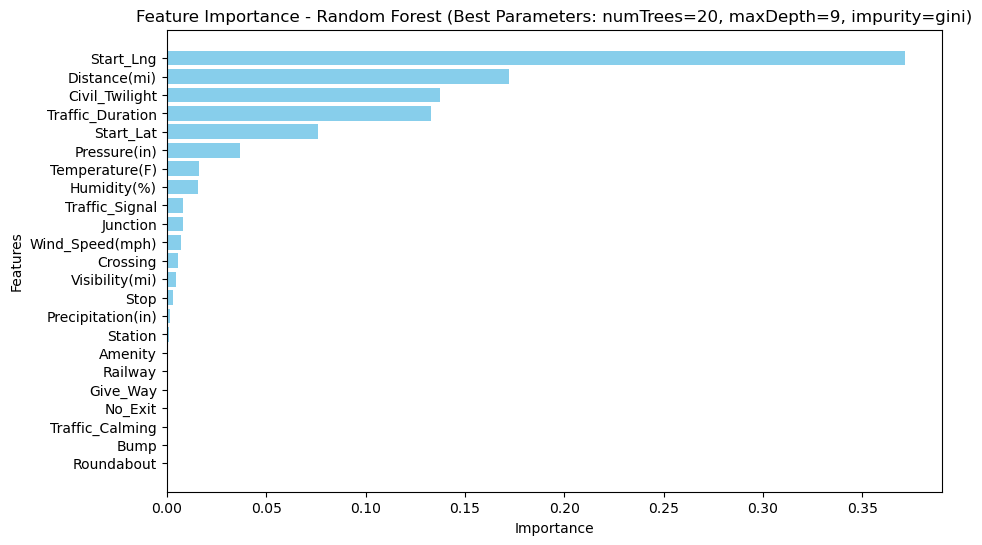

In [36]:
# Extract feature importances
best_feature_importances = rf_best_model.featureImportances

# Create a dictionary of feature names and their importances
best_importance_dict = {feature: importance for feature, importance in zip(feature_columns, best_feature_importances)}

# Sort the features by importance
sorted_best_importance = sorted(best_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Prepare data for plotting
features, importances = zip(*sorted_best_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest (Best Parameters: numTrees=20, maxDepth=9, impurity=gini)")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


24/12/03 03:22:50 WARN DAGScheduler: Broadcasting large task binary with size 1825.9 KiB
24/12/03 03:22:53 WARN DAGScheduler: Broadcasting large task binary with size 1791.6 KiB
24/12/03 03:22:53 WARN DAGScheduler: Broadcasting large task binary with size 1791.3 KiB
24/12/03 03:22:53 WARN DAGScheduler: Broadcasting large task binary with size 1786.4 KiB
24/12/03 03:22:54 WARN DAGScheduler: Broadcasting large task binary with size 1828.9 KiB
24/12/03 03:22:56 WARN DAGScheduler: Broadcasting large task binary with size 1812.7 KiB
24/12/03 03:22:56 WARN DAGScheduler: Broadcasting large task binary with size 1802.3 KiB


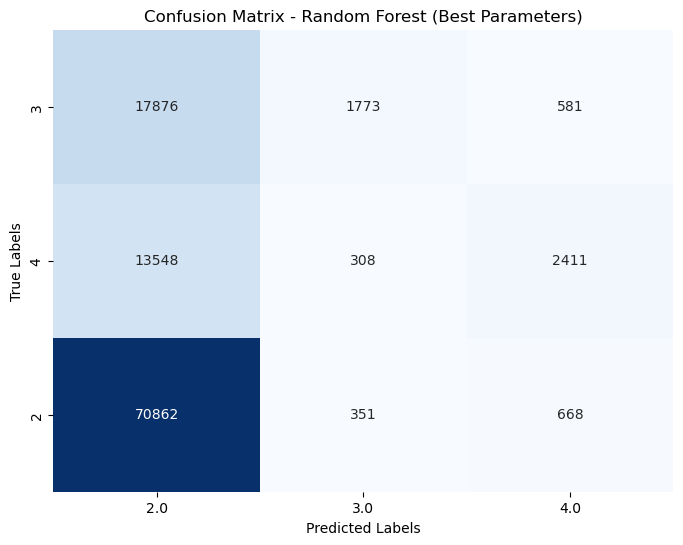

In [37]:
# Create confusion matrix from predictions
confusion_matrix = predictions.groupBy("Severity", "prediction").count()

# Pivot the confusion matrix for better visualization
confusion_matrix_pivot = confusion_matrix.groupBy("Severity").pivot("prediction").sum("count").fillna(0)

# Convert to Pandas for heatmap visualization
confusion_matrix_pd = confusion_matrix_pivot.toPandas()

# Set the index to true labels (Severity)
confusion_matrix_pd.set_index("Severity", inplace=True)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_pd, annot=True, fmt=".0f", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest (Best Parameters)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Naive Bayes

In [43]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, DoubleType
from pyspark.ml.linalg import DenseVector

# UDF për të kthyer SparseVector në një Array
def vector_to_array(vector):
    return vector.toArray().tolist() if hasattr(vector, "toArray") else vector

vector_to_array_udf = udf(vector_to_array, ArrayType(DoubleType()))

# Kthe `features` në një array
train_macro = train_macro.withColumn("features_array", vector_to_array_udf(col("features")))
test_macro = test_macro.withColumn("features_array", vector_to_array_udf(col("features")))



In [44]:
# Merr numrin e veçorive nga një shembull i parë
num_features = len(train_macro.select("features_array").first()[0])

# Emrat e kolonave të reja
feature_columns = [f"feature_{i}" for i in range(num_features)]

# Ekspando array në kolona individuale
for i in range(num_features):
    train_macro = train_macro.withColumn(feature_columns[i], col("features_array")[i])
    test_macro = test_macro.withColumn(feature_columns[i], col("features_array")[i])



In [45]:
# Kontrollo për vlera negative ose NaN
invalid_rows = train_macro.filter(
    " OR ".join([f"({col} < 0 OR isnan({col}) OR isnull({col}))" for col in feature_columns])
)
invalid_rows.show(truncate=False)


+------------------+------------------+------------------+--------------+-----------+------------+--------------+---------------+-----------------+------------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+--------------+--------+-----------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+------------------+------------------+---------+---------+---------+---------+---------+---------+------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|Start_Lat         |Start_Lng         |Distance(mi)      |Temperature(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Speed(mph)|Precipi

24/12/03 03:47:33 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 661 (TID 7477): Attempting to kill Python Worker


In [46]:
sample_data = train_macro.sample(fraction=0.1, seed=42)


24/12/03 03:50:35 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


Accuracy: 0.0001
Classification Report:


/Users/elvislleshi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elvislleshi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elvislleshi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elvislleshi

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         2.0       0.38      0.00      0.00     71881
         3.0       0.00      0.00      0.00     20230
         4.0       0.00      0.00      0.00     16267

    accuracy                           0.00    108378
   macro avg       0.09      0.00      0.00    108378
weighted avg       0.25      0.00      0.00    108378



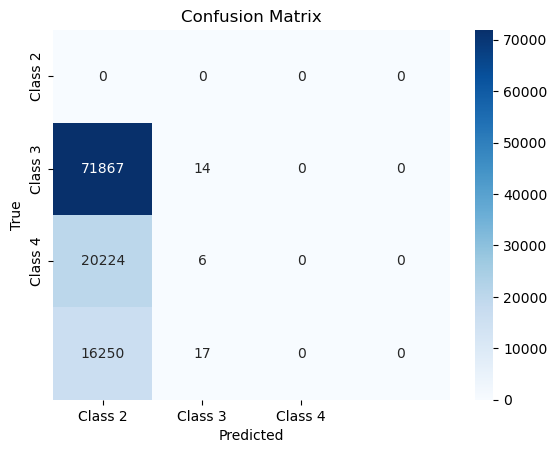

In [47]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Kontrolli dhe shkallëzimi i të dhënave
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(train_macro)
train_macro_scaled = scaler_model.transform(train_macro)
test_macro_scaled = scaler_model.transform(test_macro)

# Naive Bayes Model
nb = NaiveBayes(featuresCol="scaled_features", labelCol="Severity", smoothing=1.0)
nb_model = nb.fit(train_macro_scaled)

# Predikimet
predictions = nb_model.transform(test_macro_scaled)

# Vlerësimi i modelit
evaluator = MulticlassClassificationEvaluator(labelCol="Severity", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.4f}")

# Matjet shtesë
print("Classification Report:")
y_true = predictions.select("Severity").rdd.flatMap(lambda x: x).collect()
y_pred = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

# Konfuzion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 2", "Class 3", "Class 4"], yticklabels=["Class 2", "Class 3", "Class 4"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Logistic regression 

Workflow:
Define Hyperparameter Grid:

Create a grid of values for maxIter, regParam, and elasticNetParam.
Iterate Over Combinations:

Train Logistic Regression for each combination of hyperparameters.
Evaluate the Model:

Use accuracy or another suitable metric to evaluate each model.
Select the Best Model:

Determine the hyperparameter combination with the highest evaluation score.
Report Results:

Plot results or display them in a table for analysis.

In [49]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import itertools
import pandas as pd

# Hyperparameter grid
hyperparameters = {
    'maxIter': [10, 50, 100],
    'regParam': [0.01, 0.1, 0.5],
    'elasticNetParam': [0.0, 0.5, 1.0]  # 0.0 = Ridge, 1.0 = Lasso, 0.5 = ElasticNet
}

# Generate all combinations
combinations = list(itertools.product(
    hyperparameters['maxIter'], 
    hyperparameters['regParam'], 
    hyperparameters['elasticNetParam']
))

results = []

# Train and evaluate Logistic Regression for each combination
for maxIter, regParam, elasticNetParam in combinations:
    print(f"Training with maxIter={maxIter}, regParam={regParam}, elasticNetParam={elasticNetParam}")
    
    # Initialize Logistic Regression
    lr = LogisticRegression(
        featuresCol="features",
        labelCol="Severity",
        maxIter=maxIter,
        regParam=regParam,
        elasticNetParam=elasticNetParam
    )
    
    # Train model
    lr_model = lr.fit(train_macro)
    
    # Make predictions
    predictions = lr_model.transform(test_macro)
    
    # Evaluate accuracy
    evaluator = MulticlassClassificationEvaluator(
        labelCol="Severity", 
        predictionCol="prediction", 
        metricName="accuracy"
    )
    accuracy = evaluator.evaluate(predictions)
    
    # Store results
    results.append({
        'maxIter': maxIter,
        'regParam': regParam,
        'elasticNetParam': elasticNetParam,
        'accuracy': accuracy
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print sorted results
print("Hyperparameter Tuning Results:")
print(results_df.sort_values(by='accuracy', ascending=False))


Training with maxIter=10, regParam=0.01, elasticNetParam=0.0


Training with maxIter=10, regParam=0.01, elasticNetParam=0.5


Training with maxIter=10, regParam=0.01, elasticNetParam=1.0


Training with maxIter=10, regParam=0.1, elasticNetParam=0.0


Training with maxIter=10, regParam=0.1, elasticNetParam=0.5


Training with maxIter=10, regParam=0.1, elasticNetParam=1.0


Training with maxIter=10, regParam=0.5, elasticNetParam=0.0


Training with maxIter=10, regParam=0.5, elasticNetParam=0.5


Training with maxIter=10, regParam=0.5, elasticNetParam=1.0


Training with maxIter=50, regParam=0.01, elasticNetParam=0.0


Training with maxIter=50, regParam=0.01, elasticNetParam=0.5


Training with maxIter=50, regParam=0.01, elasticNetParam=1.0


Training with maxIter=50, regParam=0.1, elasticNetParam=0.0


Training with maxIter=50, regParam=0.1, elasticNetParam=0.5


Training with maxIter=50, regParam=0.1, elasticNetParam=1.0


Training with maxIter=50, regParam=0.5, elasticNetParam=0.0


Training with maxIter=50, regParam=0.5, elasticNetParam=0.5


Training with maxIter=50, regParam=0.5, elasticNetParam=1.0


Training with maxIter=100, regParam=0.01, elasticNetParam=0.0


Training with maxIter=100, regParam=0.01, elasticNetParam=0.5


Training with maxIter=100, regParam=0.01, elasticNetParam=1.0


Training with maxIter=100, regParam=0.1, elasticNetParam=0.0


Training with maxIter=100, regParam=0.1, elasticNetParam=0.5


Training with maxIter=100, regParam=0.1, elasticNetParam=1.0


Training with maxIter=100, regParam=0.5, elasticNetParam=0.0


Training with maxIter=100, regParam=0.5, elasticNetParam=0.5


Training with maxIter=100, regParam=0.5, elasticNetParam=1.0


Hyperparameter Tuning Results:
    maxIter  regParam  elasticNetParam  accuracy
18      100      0.01              0.0  0.670108
9        50      0.01              0.0  0.670108
0        10      0.01              0.0  0.669961
1        10      0.01              0.5  0.668346
10       50      0.01              0.5  0.668328
19      100      0.01              0.5  0.668328
2        10      0.01              1.0  0.667682
20      100      0.01              1.0  0.667635
11       50      0.01              1.0  0.667635
3        10      0.10              0.0  0.667183
21      100      0.10              0.0  0.667183
12       50      0.10              0.0  0.667183
24      100      0.50              0.0  0.663926
6        10      0.50              0.0  0.663926
15       50      0.50              0.0  0.663926
22      100      0.10              0.5  0.663253
13       50      0.10              0.5  0.663253
4        10      0.10              0.5  0.663253
17       50      0.50              1.0

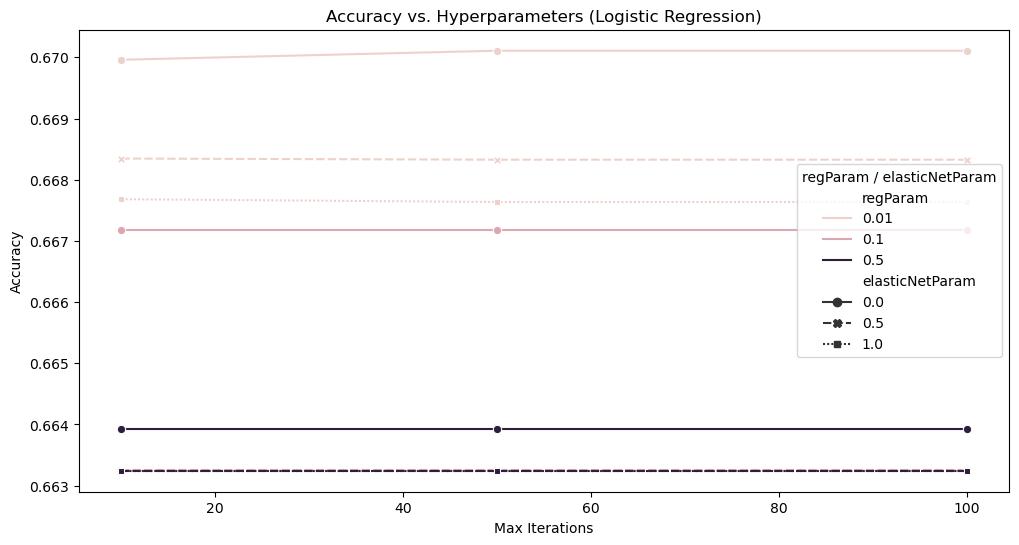

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot for accuracy vs hyperparameters
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x="maxIter", y="accuracy", hue="regParam", style="elasticNetParam", markers=True)
plt.title("Accuracy vs. Hyperparameters (Logistic Regression)")
plt.xlabel("Max Iterations")
plt.ylabel("Accuracy")
plt.legend(title="regParam / elasticNetParam")
plt.show()


Final Test Accuracy: 0.6701


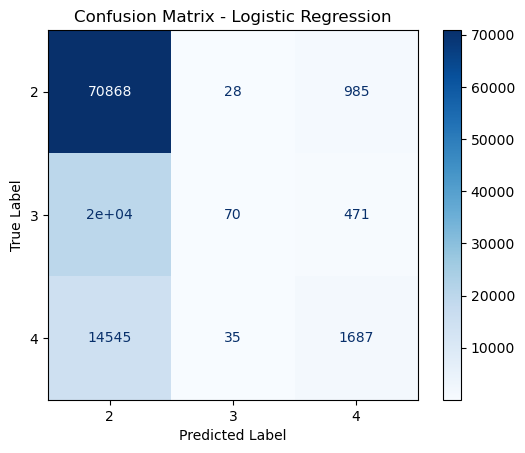

In [52]:
# Train the final model with best hyperparameters
best_lr = LogisticRegression(
    featuresCol="features", 
    labelCol="Severity", 
    maxIter=100,       # Maximum number of iterations
    regParam=0.01,     # Regularization parameter
    elasticNetParam=0.0  # ElasticNet parameter (0 for L2 regularization)
)

# Train the model
best_lr_model = best_lr.fit(train_macro)

# Make predictions on the test data
final_predictions = best_lr_model.transform(test_macro)

# Evaluate the final model's accuracy
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", 
    predictionCol="prediction", 
    metricName="accuracy"
)
final_accuracy = evaluator.evaluate(final_predictions)
print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Extract true labels and predictions for confusion matrix
y_true = final_predictions.select(col("Severity")).collect()
y_pred = final_predictions.select(col("prediction")).collect()

# Convert PySpark Row objects to simple lists
y_true = [row.Severity for row in y_true]
y_pred = [row.prediction for row in y_pred]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2, 3, 4])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Final Test Accuracy: 0.6701


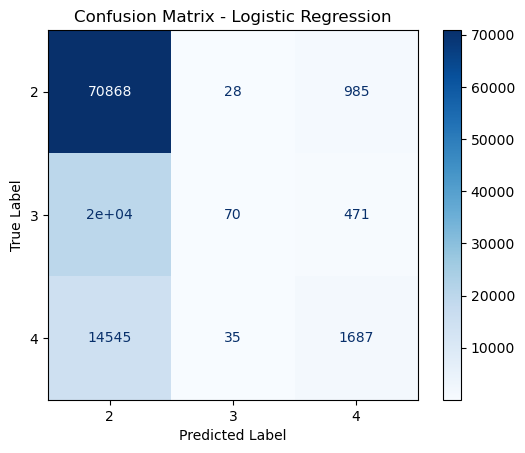


Top 10 Features by Importance:
              Feature  Importance
17         Roundabout    0.586147
19               Stop    0.228706
22     Civil_Twilight    0.225841
11               Bump    0.186787
14           Junction    0.142160
8   Precipitation(in)    0.129651
10            Amenity    0.116855
16            Railway    0.090097
2        Distance(mi)    0.066568
12           Crossing    0.064875


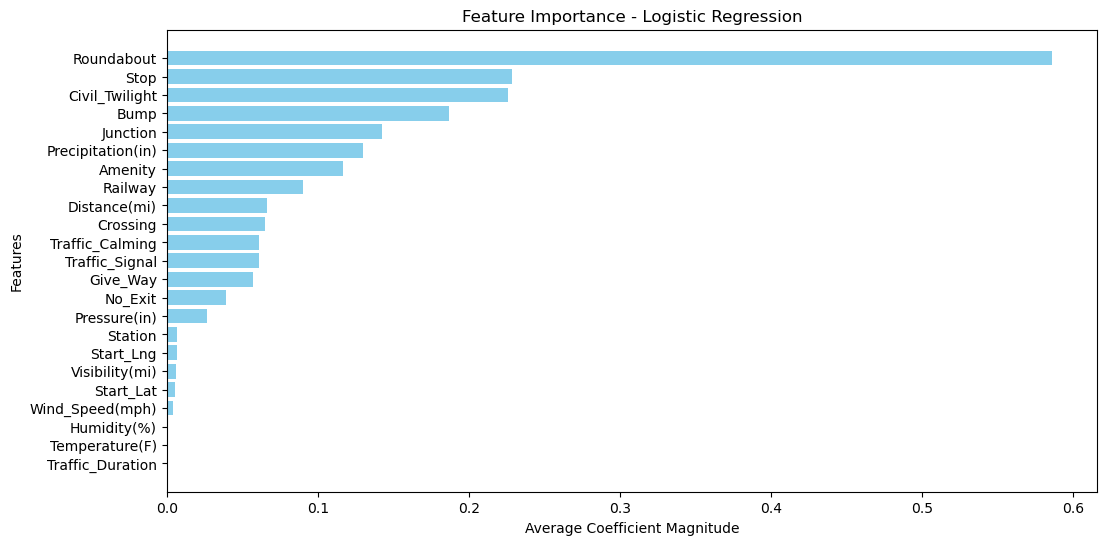

In [55]:
# Train the final model with best hyperparameters
best_lr = LogisticRegression(
    featuresCol="features", 
    labelCol="Severity", 
    maxIter=100,       # Maximum number of iterations
    regParam=0.01,     # Regularization parameter
    elasticNetParam=0.0  # ElasticNet parameter (0 for L2 regularization)
)

# Train the model
best_lr_model = best_lr.fit(train_macro)

# Make predictions on the test data
final_predictions = best_lr_model.transform(test_macro)

# Evaluate the final model's accuracy
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", 
    predictionCol="prediction", 
    metricName="accuracy"
)
final_accuracy = evaluator.evaluate(final_predictions)
print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Extract true labels and predictions for confusion matrix
y_true = final_predictions.select(col("Severity")).collect()
y_pred = final_predictions.select(col("prediction")).collect()

# Convert PySpark Row objects to simple lists
y_true = [row.Severity for row in y_true]
y_pred = [row.prediction for row in y_pred]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2, 3, 4])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Extract and plot feature importance (parameter importance)
import pandas as pd
import matplotlib.pyplot as plt

# Extract coefficients as a matrix (multinomial logistic regression)
coefficient_matrix = best_lr_model.coefficientMatrix

# Convert the matrix to an array for easier handling
coefficient_array = coefficient_matrix.toArray()

# Extract feature names from metadata
feature_names = train_macro.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]
feature_names = [attr["name"] for attr in feature_names]

# Combine feature names and the average absolute importance of each feature across classes
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": abs(coefficient_array).mean(axis=0)  # Taking the mean across classes
}).sort_values(by="Importance", ascending=False)

# Display the top 10 features
print("\nTop 10 Features by Importance:")
print(importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Average Coefficient Magnitude")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.show()
